In [5]:
from google.colab import drive

drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet, stopwords
from nltk import word_tokenize, pos_tag
import matplotlib.pyplot as plt
import json
import re

In [7]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
def extract_tweet_data_part_3(filenames):
  # features required: tweet text
  # target: relative time so timestamp
  num_non_tweets = 0
  num_non_english = 0
  num_non_text = 0
  num_non_timestamp = 0

  df = pd.DataFrame(columns = ['Text', 'Timestamp'])

  for filename in filenames:
    with open(filename, encoding = "UTF-8") as file:
      while True:
        tweet = file.readline()
        
        # reached end of file
        if not tweet:
          num_non_tweets += 1
          break
        
        tweet_json = json.loads(tweet)

        if (tweet_json['tweet']['lang'] != 'en'):
          num_non_english += 1
          continue

        tweet_text = tweet_json['tweet']['text']
        tweet_timestamp = tweet_json['citation_date']        
        
        if not tweet_text:
          num_non_text += 1
          continue;
        if not tweet_timestamp:
          num_non_timestamp += 1
          continue;

        df = df.append({'Text': tweet_text, 'Timestamp': tweet_timestamp}, ignore_index = True)
  
  print(num_non_tweets)
  print(num_non_english)
  print(num_non_text)
  print(num_non_timestamp)
  return df

In [9]:
df = extract_tweet_data_part_3(['drive/MyDrive/Twitter/tweets_#nfl.txt'])

1
28487
0
0


In [6]:
# save for future use, to not rerun extraction again
from google.colab import files

df.to_csv('df_part_3.csv', encoding = "UTF-8")
files.download('df_part_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('/content/df_part_3 (2).csv', encoding = "UTF-8")

In [7]:
# save text as a text file, this is processed locally using the script provided by GLoVE Twitter
# https://nlp.stanford.edu/projects/glove/preprocess-twitter.rb
pd.set_option('display.max_colwidth', -1)

writePath = 'drive/MyDrive/Twitter/tweets_text_nfl_1.txt'

with open(writePath, 'a') as f:
    dfAsString = df["Text"].to_string(header=False, index=False)
    f.write(dfAsString)

pd.set_option('display.max_colwidth', 50)

In [10]:
print(df)

                                                     Text   Timestamp
0       Who do you have?!?! #nfl #NFLPlayoffs #Packers...  1421517546
1       One more week until the #Seahawks begin the #N...  1421518663
2       We have NFLSHOP on our site! 3% cash back and ...  1421380685
3       Most @SuperBowl wins: #Steelers (6), #49ers &a...  1421257471
4       Most @SuperBowl losses: #Broncos (5), #Patriot...  1421257473
...                                                   ...         ...
204530  The final play for the #Patriots and #Seahawks...  1423326205
204531  Watching #nfl network. Replaying #sb49. Never ...  1423333359
204532  Four players were fined for the brawl late in ...  1423334230
204533  Huge touchdown by our guy @dannyamendola Don’t...  1423335301
204534  Big time takeaway by @Seahawks! Make sure you ...  1423335336

[204535 rows x 2 columns]


In [11]:
# read the text file into a list of strings, with any leading or trailing whitespace removed
with open('cleaned_tweets_1.txt', 'r') as f:
    lines = [line.strip() for line in f.readlines()]

# create a DataFrame from the list of strings
df_cleaned = pd.DataFrame({'Cleaned': lines})

print(df_cleaned)

                                                  Cleaned
0       who do you have! <repeat> <hashtag> nfl <hasht...
1       one more week until the <hashtag> seahawks beg...
2       we have nflshop <allcaps> on our site! <number...
3       most <user> wins: <hashtag> steelers (<number>...
4       most <user> losses: <hashtag> broncos (<number...
...                                                   ...
204530  the final play for the <hashtag> patriots and ...
204531  watching <hashtag> nfl network. replaying <has...
204532  four players were fined for the brawl late in ...
204533  huge touchdown by our guy <user> don’t miss hi...
204534  big time takeaway by <user>! make sure you cat...

[204535 rows x 1 columns]


In [12]:
df_merged = pd.concat([df, df_cleaned], axis=1)

print(df_merged)

                                                     Text   Timestamp  \
0       Who do you have?!?! #nfl #NFLPlayoffs #Packers...  1421517546   
1       One more week until the #Seahawks begin the #N...  1421518663   
2       We have NFLSHOP on our site! 3% cash back and ...  1421380685   
3       Most @SuperBowl wins: #Steelers (6), #49ers &a...  1421257471   
4       Most @SuperBowl losses: #Broncos (5), #Patriot...  1421257473   
...                                                   ...         ...   
204530  The final play for the #Patriots and #Seahawks...  1423326205   
204531  Watching #nfl network. Replaying #sb49. Never ...  1423333359   
204532  Four players were fined for the brawl late in ...  1423334230   
204533  Huge touchdown by our guy @dannyamendola Don’t...  1423335301   
204534  Big time takeaway by @Seahawks! Make sure you ...  1423335336   

                                                  Cleaned  
0       who do you have! <repeat> <hashtag> nfl <hasht...  
1  

In [13]:
# Remove stop words

stop_words = set(nltk.corpus.stopwords.words('english'))

df_merged['Cleaned'] = df_merged['Cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

print(df_merged)

                                                     Text   Timestamp  \
0       Who do you have?!?! #nfl #NFLPlayoffs #Packers...  1421517546   
1       One more week until the #Seahawks begin the #N...  1421518663   
2       We have NFLSHOP on our site! 3% cash back and ...  1421380685   
3       Most @SuperBowl wins: #Steelers (6), #49ers &a...  1421257471   
4       Most @SuperBowl losses: #Broncos (5), #Patriot...  1421257473   
...                                                   ...         ...   
204530  The final play for the #Patriots and #Seahawks...  1423326205   
204531  Watching #nfl network. Replaying #sb49. Never ...  1423333359   
204532  Four players were fined for the brawl late in ...  1423334230   
204533  Huge touchdown by our guy @dannyamendola Don’t...  1423335301   
204534  Big time takeaway by @Seahawks! Make sure you ...  1423335336   

                                                  Cleaned  
0       have! <repeat> <hashtag> nfl <hashtag> n f l p...  
1  

## Pre-processing and using GLoVE Embeddings

In [14]:
df1 = df_merged # save a clone in case things go wrong

In [15]:
# df = pd.read_csv('df_part_2.csv', encoding = "UTF-8")
df1.dropna(inplace=True)

In [16]:
# extracted using http://superadsdb.com/2015/timeline
kickoff_time = 1422833460
game_over_time = 1422846417

# three classes for relative time
BEFORE = 0
DURING = 1
AFTER = 2

def create_relative_time_labels(timestamp):
  if timestamp < kickoff_time:
    return BEFORE
  elif timestamp > game_over_time:
    return AFTER
  else:
    return DURING

# add label data to the dataframe
df1['Label'] = df1['Timestamp'].apply(create_relative_time_labels)

<Axes: >

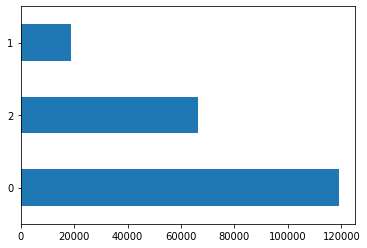

In [17]:
# Look at the spread to see if we need to deal with class imbalances
df1['Label'].value_counts().plot(kind='barh')

In [18]:
# sample 20000 tweets for before and after superbowl
df_before = df1[df1.Label == 0].sample(20000, random_state=42)
print(df_before)

df_after = df1[df1.Label == 2].sample(20000, random_state=42)
print(df_after)

df_during = df1[df1.Label == 1]
print(df_during)

                                                     Text   Timestamp  \
1025    #NFL #PeytonManning *AUTO / AUTOGRAPH SIGNED O...  1421261841   
47977   #Patriots #RobertMueller - NFL withholds judgm...  1422046426   
46496   Philadelphia #Eagles Donovan Mcnabb Philadelph...  1422032140   
83656   Secret Weapons for Top #NFL Teams http://t.co/...  1422599458   
68052   On DeflateGate, Statistics, and Reasonable Inf...  1422423710   
...                                                   ...         ...   
117660  Super Bowl Halftime Show 2015: Final Prop Odds...  1422832616   
22684   What side shall I be on? #AFCChampionship Game...  1421625317   
68583   [USA Today] - Family has high-tech solution to...  1422439119   
45425   #NFL #sweatshirts KANSAS CITY CHIEFS NFL LONG ...  1422021039   
99968   [Providence Journal] - Ranking the 10 best Sup...  1422756042   

                                                  Cleaned  Label  
1025    <hashtag> nfl <allcaps> <allcaps> <hashtag> pe..

In [19]:
final_df = pd.concat([df_before, df_during, df_after], ignore_index=True)
print(final_df)

                                                    Text   Timestamp  \
0      #NFL #PeytonManning *AUTO / AUTOGRAPH SIGNED O...  1421261841   
1      #Patriots #RobertMueller - NFL withholds judgm...  1422046426   
2      Philadelphia #Eagles Donovan Mcnabb Philadelph...  1422032140   
3      Secret Weapons for Top #NFL Teams http://t.co/...  1422599458   
4      On DeflateGate, Statistics, and Reasonable Inf...  1422423710   
...                                                  ...         ...   
58961  Haley: Four rings tainted for 'cheat' Brady......  1423154961   
58962  #Riders announce the release of Ben Heenan so ...  1422911420   
58963  #AndrewLuck #NFL 2012 ROOKIES &amp; STARS FOOT...  1423220405   
58964  5 most menacing #NFL players of all time   htt...  1423086330   
58965  #AndrewLuck #NFL 2012 Andrew Luck 4 Card Lot T...  1422923614   

                                                 Cleaned  Label  
0      <hashtag> nfl <allcaps> <allcaps> <hashtag> pe...      0  
1  

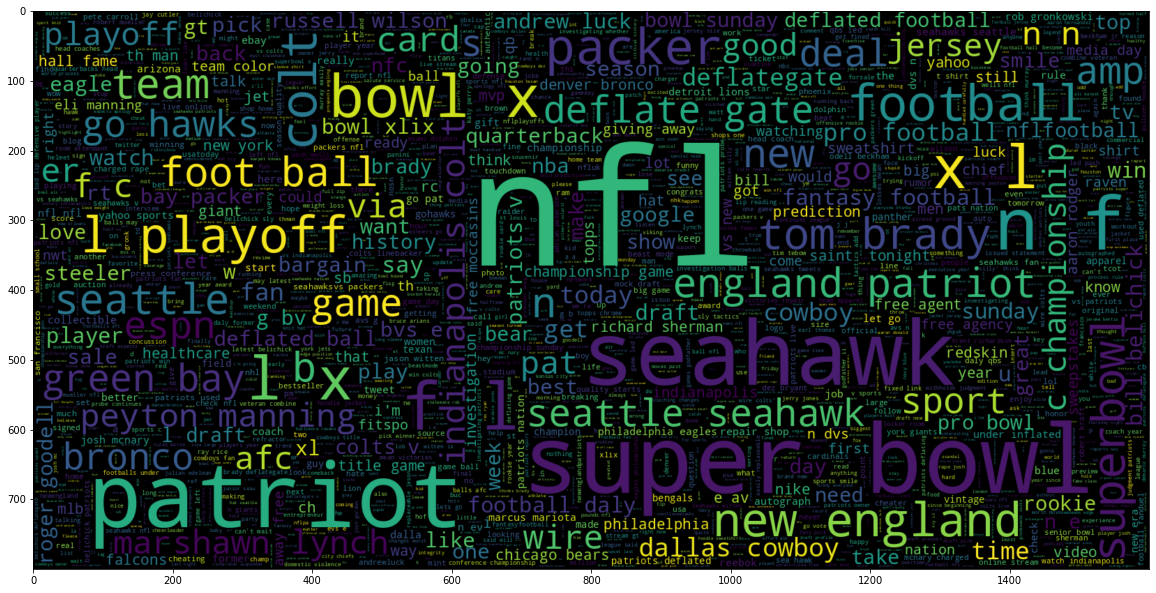

In [20]:
from wordcloud import WordCloud

list_of_glove_tags = ['hashtag', 'url', 'user', 'number', 'allcaps', 'repeat', 'elong']

# Print word clouds to analyze some key words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, stopwords=list_of_glove_tags).generate(" ".join(final_df[final_df.Label == 0].Cleaned))
plt.imshow(wc , interpolation = 'bilinear')

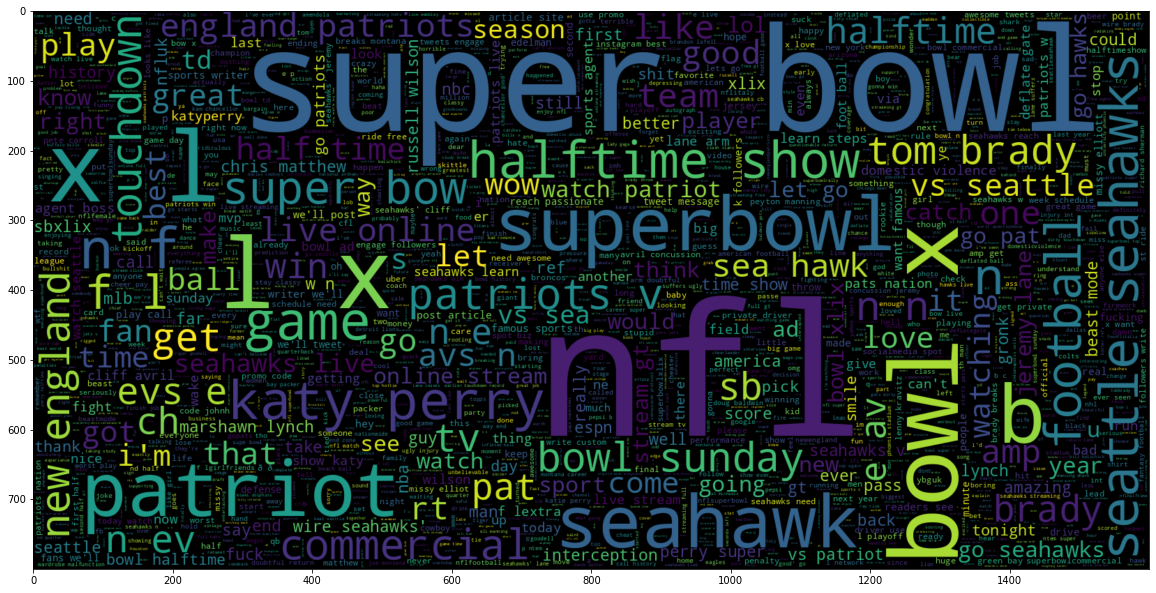

In [21]:
from wordcloud import WordCloud

list_of_glove_tags = ['hashtag', 'url', 'user', 'number', 'allcaps', 'repeat', 'elong']

# Print word clouds to analyze some key words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, stopwords=list_of_glove_tags).generate(" ".join(final_df[final_df.Label == 1].Cleaned))
plt.imshow(wc , interpolation = 'bilinear')

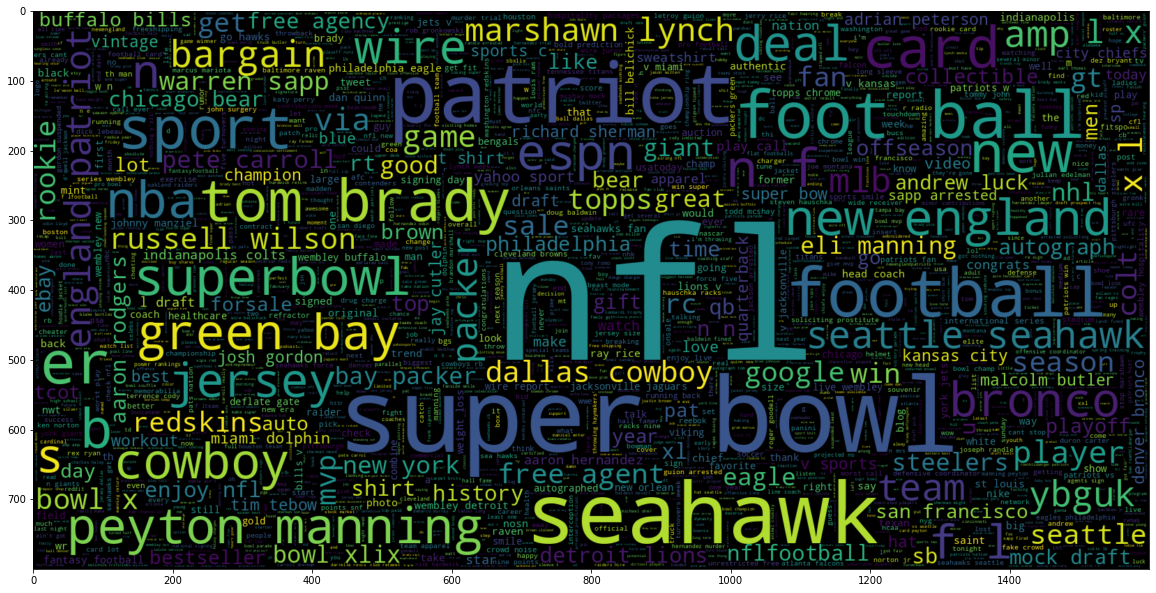

In [22]:
from wordcloud import WordCloud

list_of_glove_tags = ['hashtag', 'url', 'user', 'number', 'allcaps', 'repeat', 'elong']

# Print word clouds to analyze some key words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, stopwords=list_of_glove_tags).generate(" ".join(final_df[final_df.Label == 2].Cleaned))
plt.imshow(wc , interpolation = 'bilinear')

In [23]:
from gensim.models import KeyedVectors

# added 1193514, 100 to the file as per: https://github.com/3Top/word2vec-api/issues/6
glove_model = KeyedVectors.load_word2vec_format('drive/MyDrive/Twitter/glove.twitter.27B.100d.txt', binary=False, encoding='utf-8')

def get_embedding_matrix(text):
    # Tokenize text into a list of words
    words = text.split()
    # Get embeddings for each word
    embeddings = [glove_model[token] for token in words if token in glove_model.vocab]
    # Return average embedding for the tweet
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(100)

In [24]:
embeddings = []
for tweet in final_df['Cleaned']:
    embedding = get_embedding_matrix(tweet)
    embeddings.append(embedding)

X = np.array(embeddings)
y = final_df[['Label']]

In [25]:
print(X.shape)
print(X)
print(y.shape)
print(y)

(58966, 100)
[[ 0.22664872  0.23673651  0.17115809 ...  0.21525852  0.54674894
   0.2762633 ]
 [ 0.34548181  0.12657602  0.23589498 ...  0.18866304  0.46076512
   0.19746555]
 [ 0.26706702  0.04438321  0.18135265 ...  0.30935404  0.42156804
   0.28834519]
 ...
 [ 0.23291521  0.08078833  0.12225129 ...  0.18156542  0.45294261
   0.22854982]
 [ 0.27779025  0.05539588  0.19487998 ...  0.03778444  0.58139557
   0.23271111]
 [ 0.18208066 -0.0026084   0.09211589 ...  0.09414108  0.22290839
   0.24051428]]
(58966, 1)
       Label
0          0
1          0
2          0
3          0
4          0
...      ...
58961      2
58962      2
58963      2
58964      2
58965      2

[58966 rows x 1 columns]


In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Convert y to categorical (one-hot encoding) variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [27]:
# Reduce dimensionality using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train, y_train_encoded)
X_test_norm = scaler.transform(X_test)

# Fit the PCA model to get 50 most important features
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)


In [28]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(44224, 50)
(14742, 50)


## kNN

(44224, 2)


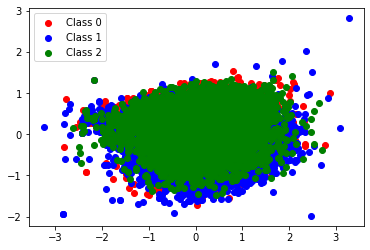

In [29]:
# Plot the datapoints to see if clustering will help
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

print(X_train_2d.shape)

# create a scatter plot of the reduced data
colors = ['r', 'b', 'g']
for i in range(3):
    idx = np.ravel(y_train) == i
    plt.scatter(X_train_2d[idx, 0], X_train_2d[idx, 1], c=colors[i], label=f'Class {i}')

plt.legend()
plt.show()

### K-NN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 25, 2)}
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_pca, np.ravel(y_train))

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict the labels for the test data using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the model's performance on the test data
accuracy = metrics.accuracy_score(np.ravel(y_test), y_pred)
precision = metrics.precision_score(np.ravel(y_test), y_pred, average='weighted')
recall = metrics.recall_score(np.ravel(y_test), y_pred, average='weighted')
f1_score = metrics.f1_score(np.ravel(y_test), y_pred, average='weighted')

print(f"Best hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")

Best hyperparameters: {'n_neighbors': 11}
Accuracy: 0.6628679962013295
Precision: 0.6632567619961429
Recall: 0.6628679962013295
F1-score: 0.6625811709678381


## CNN

In [31]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_pca, y_train_encoded, test_size=0.2, stratify=y_train_encoded)
X_test_cnn = X_test_pca
y_test_cnn = y_test_encoded

(44224, 50)
(14742, 50)
(44224, 3)
(14742, 3)


In [32]:
print(X_train_cnn)
print(y_train_cnn)
print(X_val_cnn)
print(y_val_cnn)

[[-2.11188607  1.92230242 -2.74017548 ... -0.31270437  0.68680993
   0.02319574]
 [ 2.46198395 -1.34749776  0.2582494  ... -0.12837494  0.32896028
   0.68040187]
 [ 2.90268179 -0.93255588  4.59734932 ...  0.23372724 -0.0099169
   0.14527285]
 ...
 [ 0.34088425 -0.20621504  2.03569158 ...  0.38075036 -0.09092002
   0.12808301]
 [ 7.44561656  0.73989768  1.12339712 ...  0.10246    -0.34234724
  -0.2433768 ]
 [ 3.95095913 -0.05890864 -2.22901125 ... -1.40935853  0.40471887
  -0.15669302]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[ 0.46900054  4.9682047  -3.00601854 ... -0.50532393 -0.56383814
  -0.89968331]
 [-2.67373314  9.70604575  0.57595972 ...  0.6036855  -0.63539581
   0.79733327]
 [ 3.16297365  4.2479147   0.0621255  ... -0.49048736  0.51829255
  -0.79425868]
 ...
 [-6.94342171 -2.46259598  1.35450029 ...  0.40258221 -0.91718661
  -0.577782  ]
 [-2.67957008  4.37552554  0.53675423 ... -0.78122002 -0.44850176
  -0.21027751]
 [ 9.53709171  1.3480

In [34]:
# Basic CNN with hyperparameter tuning using Hyperband
%pip install -q -U keras_tuner

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense, MaxPool1D, Reshape
from keras.optimizers import Adam
import keras_tuner as kt

# 3 Layer CNN with tunable parameters for grid search
def build_model(hp):
  model = Sequential()
  model.add(Reshape((50, 1), input_shape=(50,)))
  model.add(Conv1D(
      filters = hp.Int('conv1_filter', min_value=16, max_value=128, step=16),
      kernel_size=hp.Choice('conv1_kernel', values=[3, 5, 7]),
      activation='relu',
      padding='same'
  ))
  model.add(MaxPool1D(pool_size=hp.Choice('maxpool1_size', values=[3, 5]), padding='same'))
  model.add(Dropout(hp.Float('dropout1', min_value=0, max_value=0.5, step=0.1)))

  model.add(Conv1D(
      filters = hp.Int('conv2_filter', min_value=32, max_value=256, step=32),
      kernel_size=hp.Choice('conv2_kernel', values=[3, 5, 7]),
      activation='relu',
      padding='same'
  ))
  model.add(MaxPool1D(pool_size=hp.Choice('maxpool2_size', values=[3, 5]), padding='same'))
  model.add(Dropout(hp.Float('dropout2', min_value=0, max_value=0.5, step=0.1)))
  
  model.add(Flatten())
  model.add(Dense(
      units=hp.Choice('dense_units', values=[32, 64, 128, 256]),
      activation = 'relu')
  )
  model.add(Dense(units=3, activation='softmax'))
  model.compile(
      optimizer=Adam(hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])),
      loss = 'categorical_crossentropy',
      metrics = ['accuracy']
  )
  return model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.9 MB/s eta 0:00:00


In [35]:
tuner_final = kt.Hyperband(build_model, objective='val_accuracy', max_epochs = 50)
tuner_final.search_space_summary()

Search space summary
Default search space size: 10
conv1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
conv1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5, 7], 'ordered': True}
maxpool1_size (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dropout1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
conv2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
conv2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5, 7], 'ordered': True}
maxpool2_size (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dropout2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_units (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256], 'o

In [36]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

early_stopping = EarlyStopping(monitor='val_loss', patience = 5)
tuner_final.search(X_train_cnn, y_train_cnn, validation_data=(X_val_cnn, y_val_cnn), epochs = 50, batch_size = 1000, callbacks=[early_stopping, TensorBoard('board')])

Trial 90 Complete [00h 00m 07s]
val_accuracy: 0.3941209614276886

Best val_accuracy So Far: 0.680158257484436
Total elapsed time: 00h 05m 27s


In [37]:
tuner_final.get_best_hyperparameters()[0]

In [38]:
# train fully using the above hyperparameters and evaluate
best_hps = tuner_final.get_best_hyperparameters()
best_cnn_model = build_model(best_hps[0])

best_cnn_model.fit(x=X_train_cnn, y=y_train_cnn)
best_cnn_score = best_cnn_model.evaluate(X_test_cnn, y_test_cnn)

print('Test loss:', best_cnn_score[0])
print('Test accuracy:', best_cnn_score[1])

461/461 [==============================] - 1s 3ms/step - loss: 0.8608 - accuracy: 0.6003
Test loss: 0.8607897758483887
Test accuracy: 0.6002577543258667


In [40]:
tuner_final.oracle.get_best_trials()[0].trial_id # to retrieve graphs

'0050'

## XGBoost

In [44]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(44224, 50)
(14742, 50)
(44224, 3)
(14742, 3)


In [42]:
%pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 10.1 MB/s eta 0:00:00


In [45]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

xgb = XGBClassifier(n_jobs=-1)

params = {
    'learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'max_depth': Integer(2, 10),
    'n_estimators': Integer(50, 500),
    'gamma': Real(1e-4, 0.5, prior='log-uniform'),
    'reg_alpha': Real(1e-4, 1.0, prior='log-uniform'),
    'reg_lambda': Real(1e-4, 1.0, prior='log-uniform'),
}

bayes_cv = BayesSearchCV(
    estimator=xgb,
    search_spaces=params,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

bayes_cv.fit(X_train_pca, y_train_encoded)

print("Best hyperparameters: ", bayes_cv.best_params_)
print("Best accuracy: ", bayes_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [47]:
# Use the best hyperparameters to fit the XGBoost classifier model on the training dataset
xgb_model = XGBClassifier(**bayes_cv.best_params_)
xgb_model.fit(X_train_pca, y_train_encoded)

# Use the fitted XGBoost classifier model to predict on the validation dataset
y_pred = xgb_model.predict(X_test_pca)

# Compute the accuracy score on the validation dataset
accuracy = metrics.accuracy_score(y_test_encoded, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6012752679419346
